##Lab 9 - Artificial Neuron — McCulloch Pitts Neuron##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import sklearn.datasets

In [2]:
cancer = sklearn.datasets.load_breast_cancer()

data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

data["Class"] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.9900,20.57000,19.6900,11.4200,20.2900,12.4500,18.25000,13.7100,13.0000,12.4600,...,11.51000,14.05000,11.20000,15.2200,20.9200,21.560,20.1300,16.60000,20.6000,7.76000
mean texture,10.3800,17.77000,21.2500,20.3800,14.3400,15.7000,19.98000,20.8300,21.8200,24.0400,...,23.93000,27.15000,29.37000,30.6200,25.0900,22.390,28.2500,28.08000,29.3300,24.54000
mean perimeter,122.8000,132.90000,130.0000,77.5800,135.1000,82.5700,119.60000,90.2000,87.5000,83.9700,...,74.52000,91.38000,70.67000,103.4000,143.0000,142.000,131.2000,108.30000,140.1000,47.92000
mean area,1001.0000,1326.00000,1203.0000,386.1000,1297.0000,477.1000,1040.00000,577.9000,519.8000,475.9000,...,403.50000,600.40000,386.00000,716.9000,1347.0000,1479.000,1261.0000,858.10000,1265.0000,181.00000
mean smoothness,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263


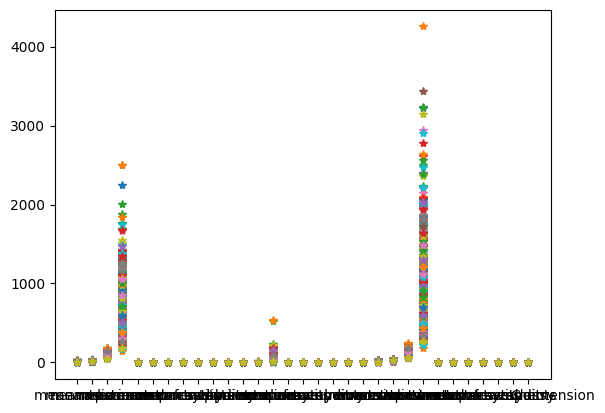

In [4]:
plt.plot(data.T,"*")
plt.show()

In [5]:
x = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3, stratify = y)

In [6]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


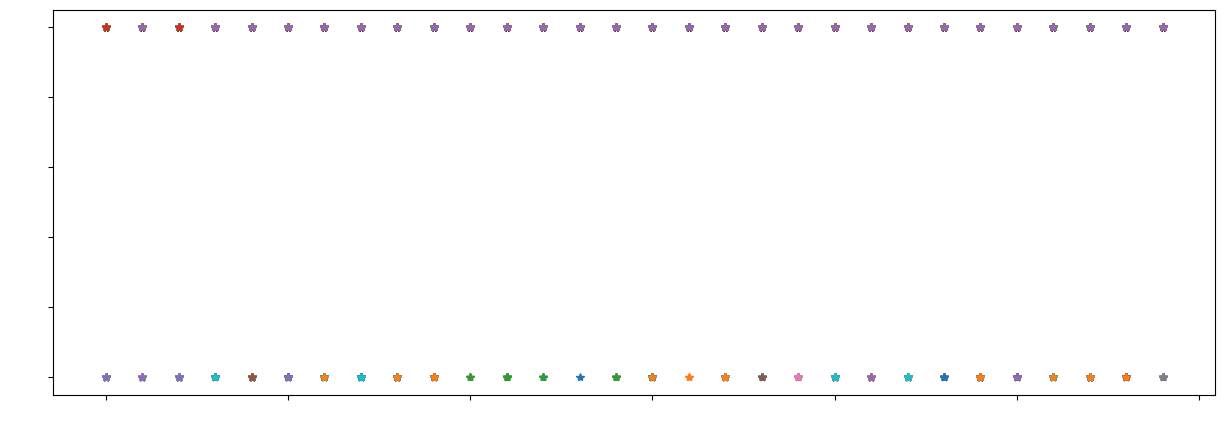

In [7]:
x_train_binarized = x_train.apply(pd.cut, bins = 2, labels = [1,0]).values
x_test_binarized = x_test.apply(pd.cut, bins = 2, labels = [1,0]).values
plt.figure(figsize=(15,5))
plt.plot(x_train_binarized.T,'*')
plt.xticks(rotation = 'vertical', c = 'white', size = 15)
plt.yticks(c = 'white', size = 15)
plt.show()

In [8]:
x_train_binarized[:,0]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [9]:
class MP_Neuron:
  def __init__(self):
    self.b = 0

  def Model(self, x):
    return np.sum(x)>=self.b

  def fit(self, x, y):
    accuracy = {}

    for b in range(x.shape[1] + 1):
      self.b = b
      yhat = []
      for row in x:
        yhat.append(self.Model(row))

      accuracy[b] = accuracy_score(yhat, y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    return [accuracy, best_b, accuracy[best_b]]

  def predict(self, x, y):
    yhat = []
    for row in x:
      yhat.append(self.Model(row))
    accuracy = accuracy_score(y, yhat)
    return accuracy

In [10]:
neuron = MP_Neuron()
accuracy, best_b, accuracy_model = neuron.fit(x_train_binarized,y_train)

print("The optimal value of b is: ", best_b)
print("accuracy_model on training data: ", accuracy_model*100)

The optimal value of b is:  27
accuracy_model on training data:  84.83516483516483


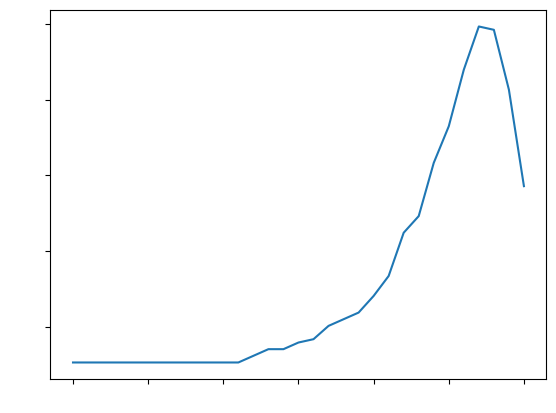

In [11]:
accuracies = list(accuracy.values())
plt.plot(accuracies)
plt.xticks(c='white')
plt.yticks(c='white')
plt.show()

In [12]:
accuracy = neuron.predict(x_test_binarized,y_test)
print("The accuracy of model on test data is :",accuracy*100)

The accuracy of model on test data is : 87.71929824561403
